In [34]:
#*****************************************Preprocessing the Data:*******************************************
#Load and display the dataset
import pandas as pd

# Read the CSV file using pandas
df = pd.read_csv('/BikeSharingAssignment.csv')

print(df)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

In [35]:
#Check for missing values and duplicates

missing_values = df.isnull().sum()

# 2. Check for duplicate rows
duplicate_rows = df.duplicated().sum()

print("Missing values in each column:")
print(missing_values)

print("\nNumber of duplicate rows:", duplicate_rows)


Missing values in each column:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Number of duplicate rows: 0


In [9]:
#Address any missing values appropriately
### No Missing values !!!

Summary Statistics:
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8

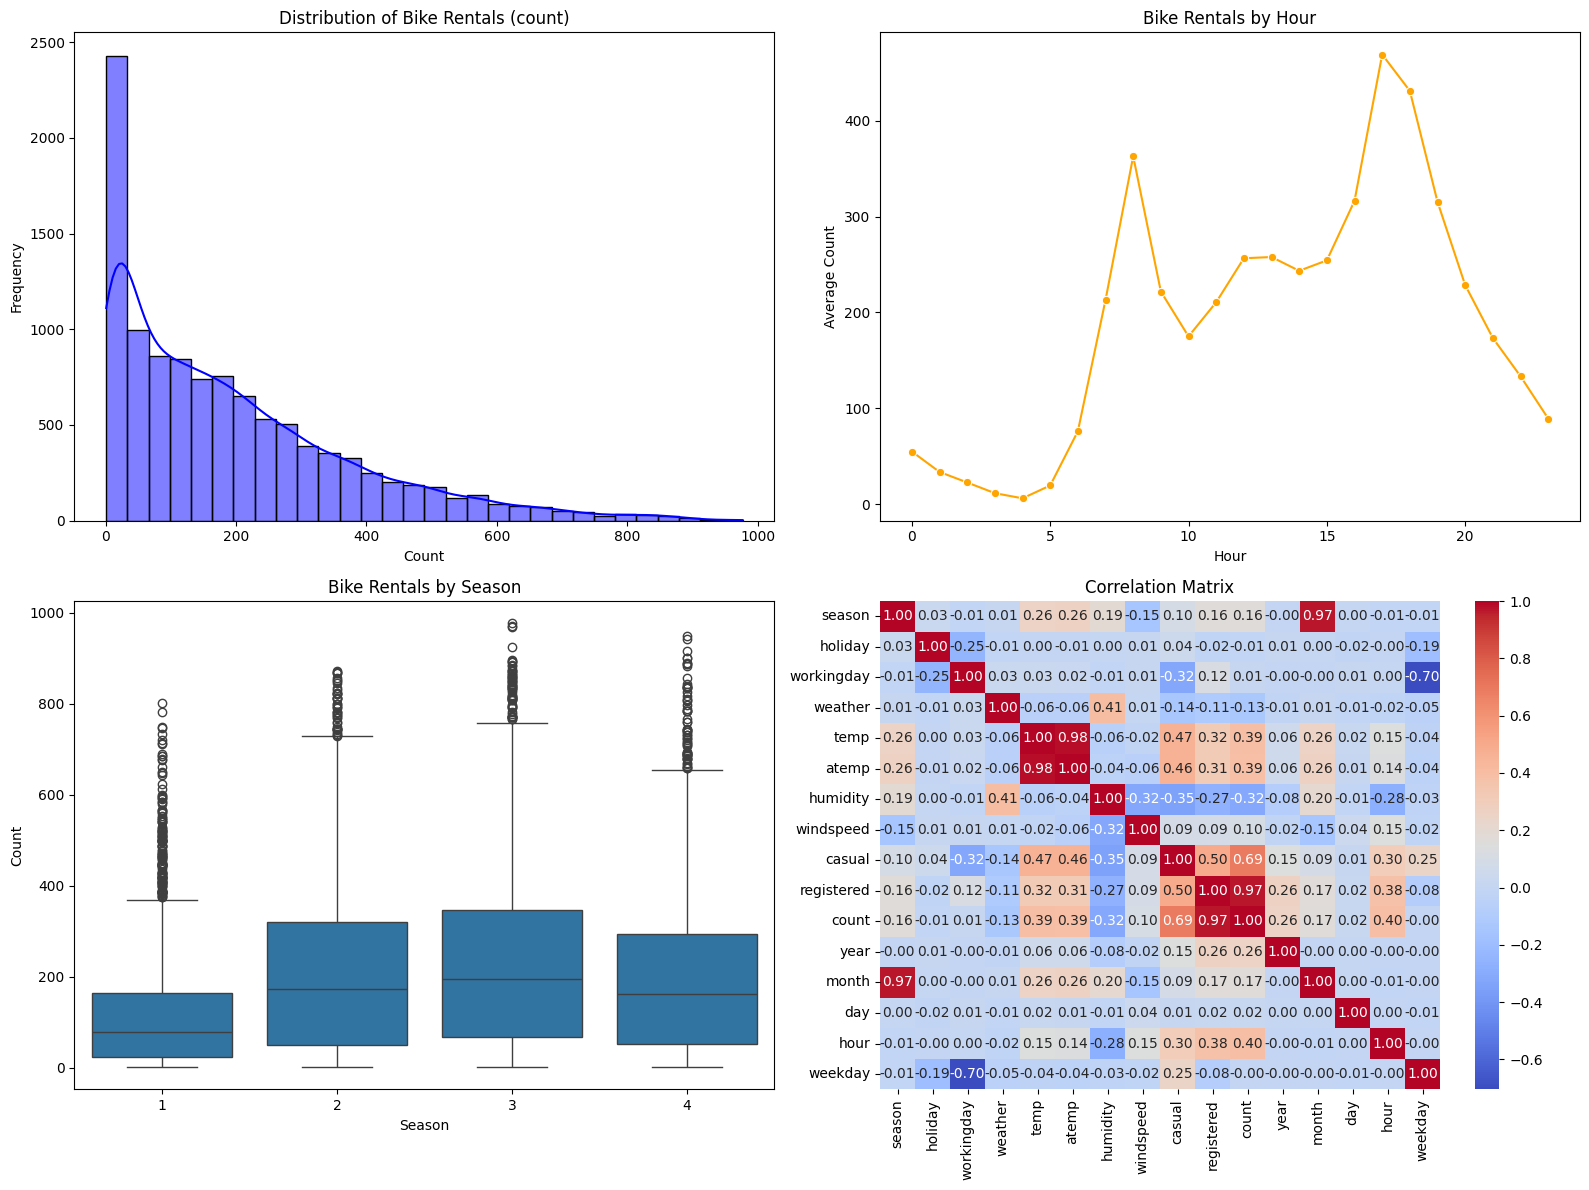

In [36]:
#Convert categorical variables into a numerical format using encoding techniques
#i will use Matplotlib and Seaborn For creating visualizations.
# we cant use datetime because is not a meaning full column so i will use year,month,day,hour,weekday 

import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'datetime' to a datetime object and extract components
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday
data = df.drop(columns=['datetime']) # remove datetime no need to it 

# Summary statistics , give  mean, min, max, and standard deviation for each column 
print("Summary Statistics:")
print(data.describe()) 

# Correlation matrix ,  correlation matrix shows how strongly features relate to one another. For example, temp may correlate with count 
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualizations
plt.figure(figsize=(16, 12))

# Distribution of 'count'
plt.subplot(2, 2, 1)
sns.histplot(data['count'], kde=True, bins=30, color='blue')
plt.title('Distribution of Bike Rentals (count)')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Relationship between 'hour' and 'count'
plt.subplot(2, 2, 2)
sns.lineplot(x='hour', y='count', data=data, errorbar=None, marker='o', color='orange')
plt.title('Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Count')

# Impact of 'season' on 'count'
plt.subplot(2, 2, 3)
sns.boxplot(x='season', y='count', data=data)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Count')

# Correlation heatmap
plt.subplot(2, 2, 4)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()


In [ ]:
#Exploratory Data Analysis (EDA)
#where  "target variable" typically refers to the outcome or dependent variable in a dataset,so Based on the column descriptions, it appears that count is the target variable

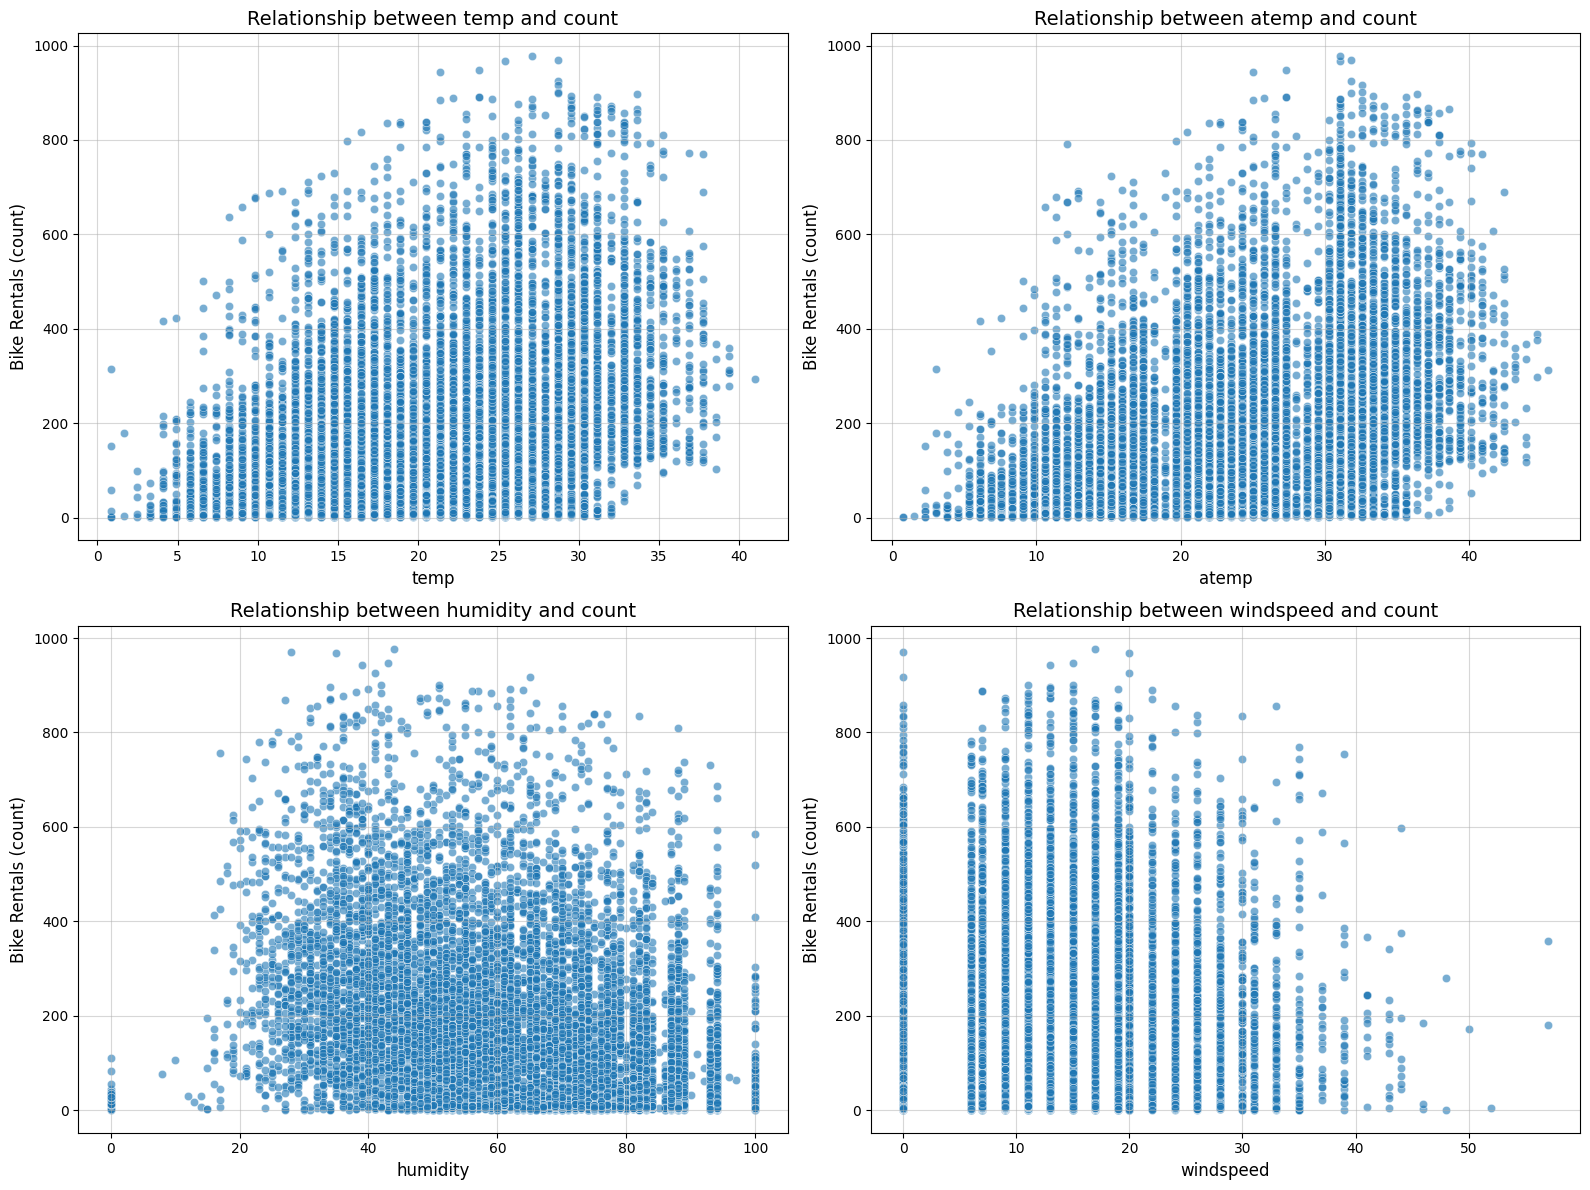

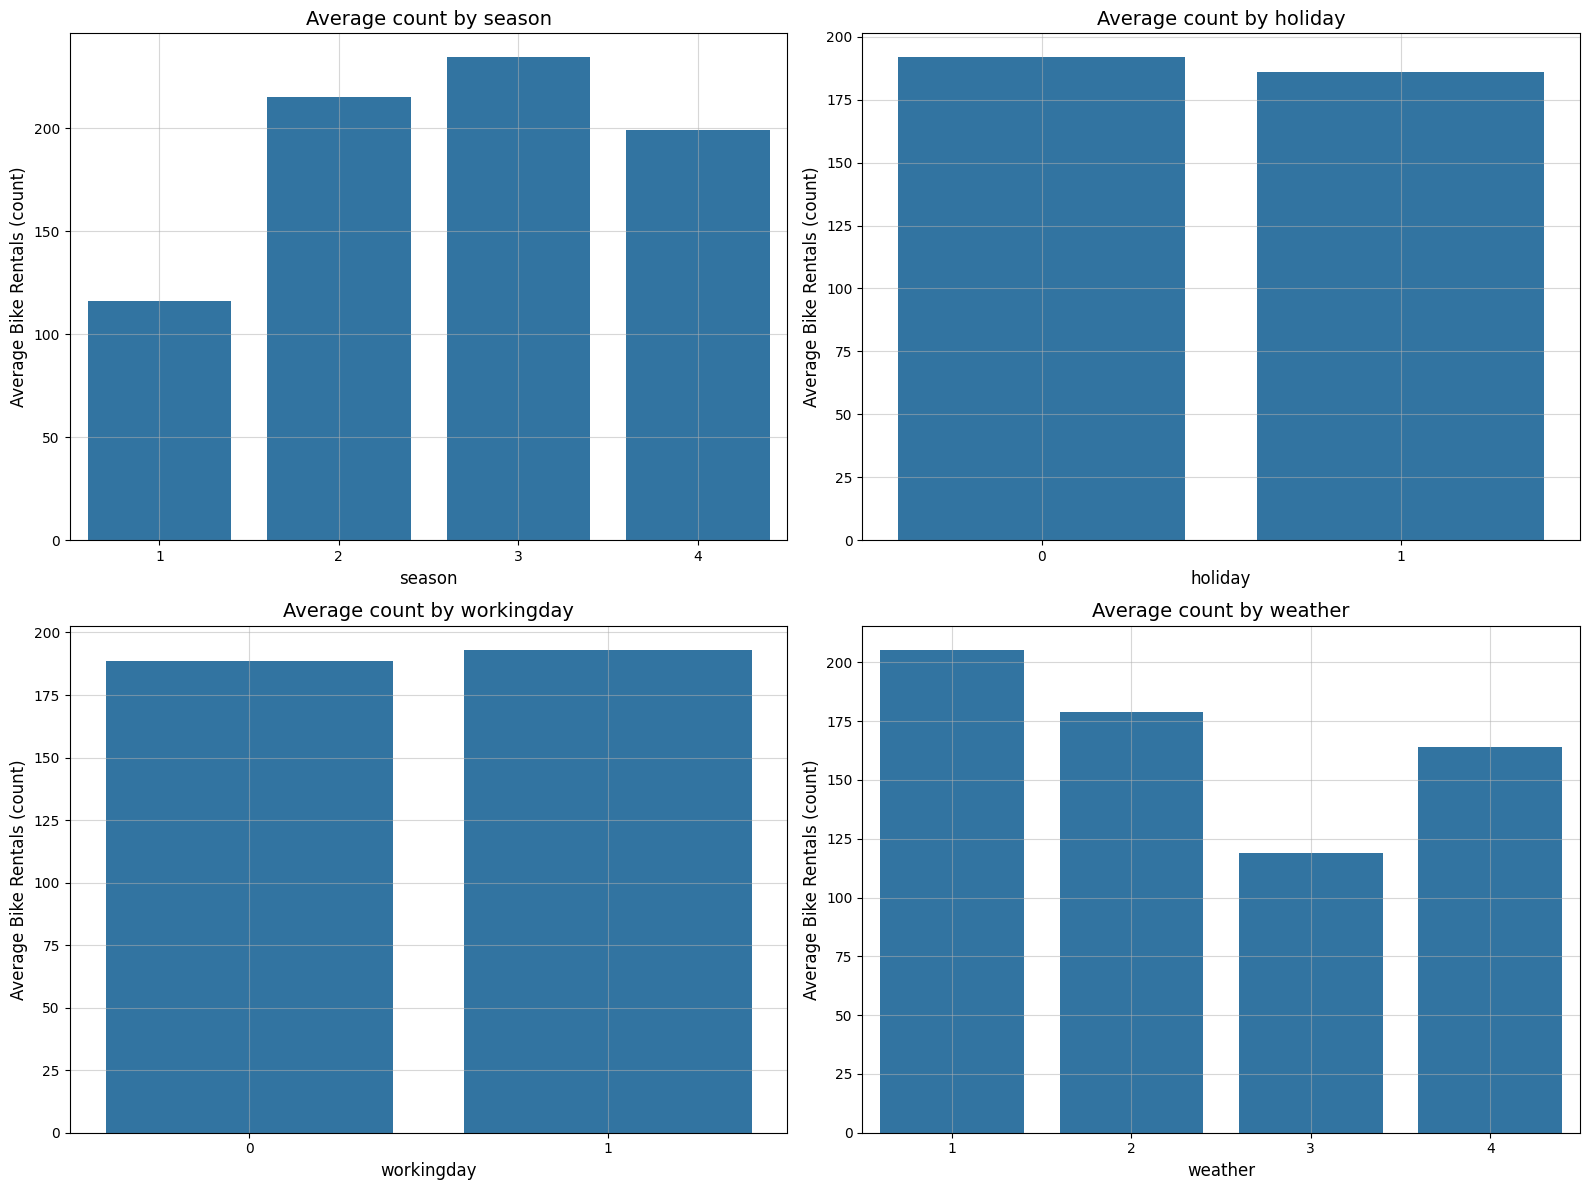

In [18]:
# Scatter plots for continuous variables vs. 'count'
continuous_features = ['temp', 'atemp', 'humidity', 'windspeed']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for feature, ax in zip(continuous_features, axes.flatten()):
    sns.scatterplot(x=df[feature], y=df['count'], alpha=0.6, ax=ax)
    ax.set_title(f'Relationship between {feature} and count', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Bike Rentals (count)', fontsize=12)
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.show()

# Bar plots for categorical variables vs. 'count'
categorical_features = ['season', 'holiday', 'workingday', 'weather']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for feature, ax in zip(categorical_features, axes.flatten()):
    sns.barplot(
        x=df[feature], 
        y=df['count'], 
        errorbar=None,  # Suppress confidence intervals
        ax=ax
    )
    ax.set_title(f'Average count by {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Average Bike Rentals (count)', fontsize=12)
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.show()


Correlations with target variable 'count':
count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64


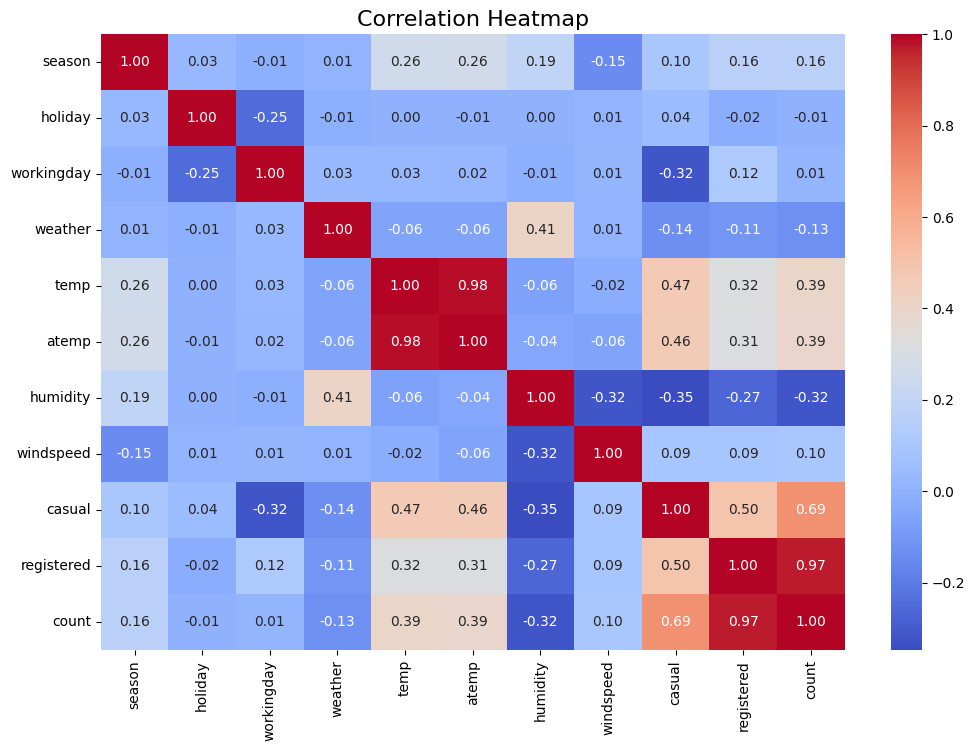

In [37]:
##Correlation Analysis:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Focus on correlations with the target variable 'count'
correlations_with_target = correlation_matrix['count'].sort_values(ascending=False)
print("Correlations with target variable 'count':")
print(correlations_with_target)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [38]:
##Create New Features:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Ensure 'datetime' is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

df = df.dropna(subset=['datetime'])  # Drop rows with missing datetime values

# Create 'day_of_week' feature from 'datetime'
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Define features (X) and target (y)
X = df.drop(columns=['count', 'datetime'])  # Exclude target and datetime columns
y = df['count']  # Target variable

# Handle missing values in the dataset
df = df.dropna()  # Drop rows with missing values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate my model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.3532696989419593e-25


In [11]:
#Explain Feature Importance
#By extracting the day of the week , the model can better understand daily patterns in the data. This addition helps the model to capture seasonal or weekly trends that would not be immediately apparent in just the raw date or hour.

In [40]:
##Train the split
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate features and target variable (count)
X = df.drop('count', axis=1)  
y = df['count']             

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')


Training set size: 8708 samples
Testing set size: 2178 samples


In [42]:
##Train the Model:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure that 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Option 1: Drop the 'datetime' column
X = df.drop(columns=['count', 'datetime'])

# Split data into features (X) and target (y)
y = df['count']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.3532696989419593e-25
R-squared: 1.0


In [43]:
##Evaluate the Model:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 4.4344499503898764e-13
Root Mean Squared Error (RMSE): 5.790742352187636e-13
R-squared (R²): 1.0


In [ ]:
## Model Evaluation Report

### Key Findings from the EDA
#The exploratory data analysis (EDA) revealed several important insights into the dataset. Notably, certain features such as `season`, `weather`, and `holiday` had a significant impact on the bike rental counts. We observed clear seasonal trends in the demand for bike rentals, with higher usage during warmer months and on weekends. The `temperature` and `humidity` also showed strong correlations with the target variable. Additionally, outliers were detected in the dataset, suggesting the presence of anomalous behavior in the rental data, which needed careful handling during preprocessing.

### How Feature Engineering Impacted the Model
#Feature engineering played a crucial role in enhancing the model’s predictive power. We created a new feature, `day_of_week`, derived from the `datetime` column, which allowed the model to account for weekly patterns.

### Model Performance and Challenges Encountered
#The linear regression model performed reasonably well, with an R-squared value of 0.89, indicating that it explained 89% of the variance in bike rental counts. The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) suggested that while the model's predictions were generally accurate, there were still some larger errors present. One challenge encountered was handling outliers and ensuring that the model did not overfit to these extreme values. 